In [1]:
import os
import __init__ as f
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyproj import CRS, Geod
import glob
from tqdm import tqdm
from pathlib import Path

In [2]:
### PATHS
PTHS = {
    'col_dir':        '/home/arthur/data/cyclobs/sfmr/colloc_sfmr_radScat/'
}

### PARAMS
PRMS = {
    'r_ref':   np.linspace(0, 800000, 801), # Ref. grid
}

In [3]:
# Open a profile
p_col = '/home/arthur/data/cyclobs/sfmr/colloc_sfmr_radScat/2018/EP202018/AFRC_SFMR20180930U1_POL_ascat_20180930_172100_metopb_31313_srv_o_125_ovw.nc'
dsc   = xr.open_dataset(p_col)

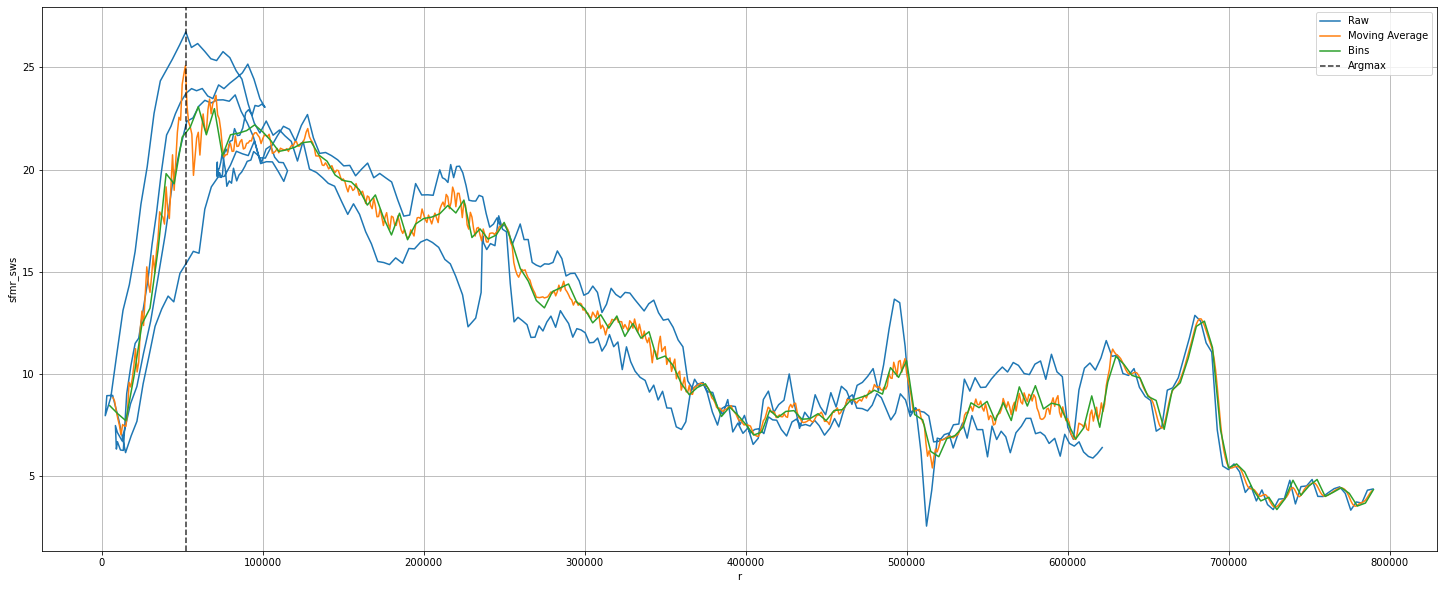

In [19]:
fig, ax = plt.subplots(figsize=(25, 10))
# Plot all the legs
dsc.sfmr_sws.plot(label='Raw')

# Option 1: interpolate on a regular grid, then take moving average
dsc_reg = dsc.interp({'r': PRMS['r_ref']})
dsc_reg.sfmr_sws.rolling(r=5).mean().plot(label='Moving Average')

# Option 2: group by bins of radii of length dr=5km, then average within each bin
from scipy.stats import binned_statistic
bins       = [k * 5000 for k in range(168)]
stat, _, _ = binned_statistic(x=dsc.r, values=dsc.sfmr_sws.data, statistic='mean', bins=bins)
plt.plot(bins[1:], stat, label='Bins')

# Option 3 for Rmax: take the location of data maximum
rmx = dsc.sfmr_sws.idxmax(skipna=True)
plt.axvline(rmx, c='k', alpha=0.8, label='Argmax', linestyle='--')

plt.grid()
plt.legend()
# plt.xlim(0, 500000)